In [1]:
import os
import openai
from abcli import file
from abcli.modules.cookie import cookie
from openai_cli import NAME, VERSION
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.82.1.


In [2]:
openai.api_key = os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
prompt = """"Write a python function named runme_001 
that inputs an image as a numpy array
and uses opencv vector functions
to return a darker version of the input image
without running a for loop on the pixels.
import all modules that are used in the code.
"""

In [4]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt,
  max_tokens=2000,
)

logger.info(f"response: {response}")

assert len(response["choices"]) == 1

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=11609 request_id=39deebcc31f4d211002b1d53608bb345 response_code=200
response: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\nimport numpy as np\nimport cv2\n\ndef runme_001(image):\n    # Convert image to HSV colorspace\n    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)\n    \n    # Create a vector of one to darken the image\n    vec = np.ones(image.shape, dtype = \"uint8\")\n    \n    # Multiply the vector by a scalar value to darken the image\n    darkVec = vec * 0.5\n    \n    # Subtract the vector from the hsvImage\n    darkenedImg = cv2.subtract(hsvImage, darkVec, dtype=cv2.CV_8U)\n    \n    # Convert the darkened image back to BGR color space\n    outputImage = cv2.cvtColor(darkenedImg, cv2.COLOR_HSV2BGR)\n    return outputImage"
    }
  ],

In [5]:
code = response["choices"][0]["text"]
logger.info(f"code: {code}")

code: 
import numpy as np
import cv2

def runme_001(image):
    # Convert image to HSV colorspace
    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Create a vector of one to darken the image
    vec = np.ones(image.shape, dtype = "uint8")
    
    # Multiply the vector by a scalar value to darken the image
    darkVec = vec * 0.5
    
    # Subtract the vector from the hsvImage
    darkenedImg = cv2.subtract(hsvImage, darkVec, dtype=cv2.CV_8U)
    
    # Convert the darkened image back to BGR color space
    outputImage = cv2.cvtColor(darkenedImg, cv2.COLOR_HSV2BGR)
    return outputImage


In [6]:
exec(code)

In [7]:
input_image = file.load_image(os.path.join(os.getenv("HOME",""),"git/blue-bracket/images/portal-34.jpg"))[1]

In [8]:
image_output = runme_001(input_image)
assert image_output.__class__.__name__ == "ndarray"

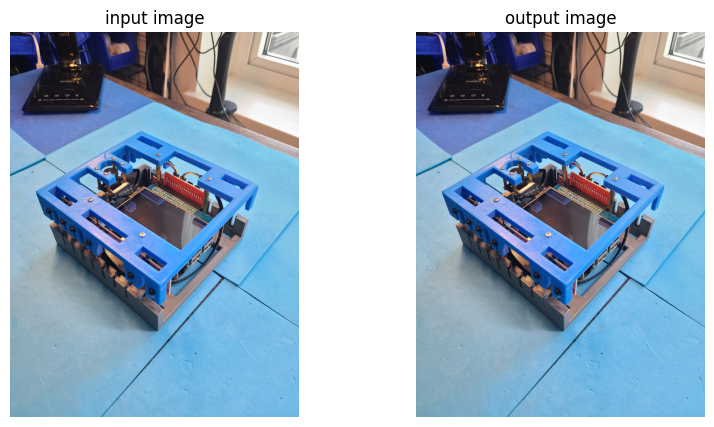

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [10]:
# END